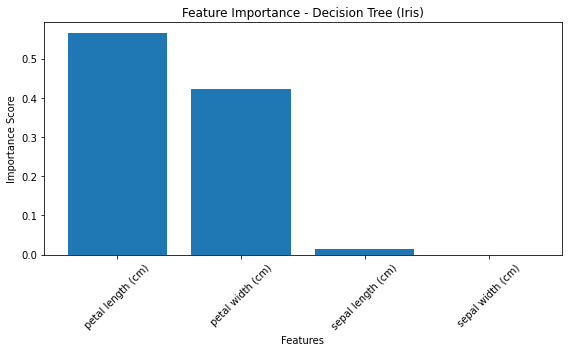

(20640, 8)
(20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.

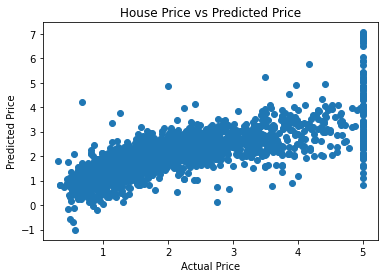

R-squared (train): 0.609
R-squared (test): 0.581
MAE: 0.542
MSE: 0.559
RMSE: 0.748


TypeError: %o format: an integer is required, not numpy.float64

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_iris, y_iris)
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
plt.title("Feature Importance - Decision Tree (Iris)")
plt.bar(range(X_iris.shape[1]), importances[indices], align="center")
plt.xticks(range(X_iris.shape[1]),
           [feature_names[i] for i in indices],
           rotation=45)
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()
california = datasets.fetch_california_housing()
print(california.data.shape)
print(california.target.shape)
print(california.feature_names)

df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

print(df.head())
print(df.describe())

X_train, X_test, y_train, y_test = train_test_split(
    california.data,
    california.target,
    test_size=0.10,
    random_state=42
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Coefficients:", lr_model.coef_)
print("Intercept: %.3f" % lr_model.intercept_)
y_pred = lr_model.predict(X_test)
print("Predicted values:", y_pred[:5])
print("Actual values:", y_test[:5])
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("House Price vs Predicted Price")
plt.show()
print("R-squared (train): %0.3f" % lr_model.score(X_train, y_train))
print("R-squared (test): %0.3f" % lr_model.score(X_test, y_test))
print("MAE: %0.3f" % metrics.mean_absolute_error(y_test, y_pred))
print("MSE: %0.3f" % metrics.mean_squared_error(y_test, y_pred))
print("RMSE: %0.3f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mean_price = np.mean(y_test)
print("10% of Mean value: %0.3f" % (mean_price * 0.1))
